In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%pylab inline
#from scipy.optimize import curve_fit
#import scipy.integrate as integrate

In [2]:
t = np.linspace( 300, 3600, num = 34 )

In [3]:
r = [5.65, 8.06, 10.56,13.23,16.09,19.00,21.94,24.93,27.94,
    30.98,34.08,37.19,40.36,43.55,46.78,50.05,53.35,56.67,
     60.06,63.48,66.91,70.39,73.91,77.49,81.04,84.70,88.33,
     92.04,95.76,99.54,103.3,107.2,111.1,115.0]

#  Formula para hallar $\beta $ que minimiza el error cuadratico medio (MCO)

$ \beta = (X^{T}X)^{-1} X^{T} Y$

In [4]:
xt = np.array(t)
Y = np.array(r)

#se añade columna de unos(1) para representar el termino independiente
C1 =  np.ones(len(xt))

# Se transpone X debido a que la matriz de parametros beta resultante, tiene la forma de 1 fila y 2 coumnas
# por tanto no esta en la forma vectorial sino en la vectorial transpuesta 
X = np.array([C1, xt]).T

# @ = Multiplicacion Matricial
# X.T = np.transpose(x) = X transpuesta
B = np.linalg.inv(X.T @ X) @ X.T @ Y

b = B[0]
m = B[1]


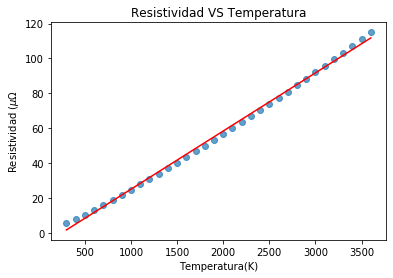

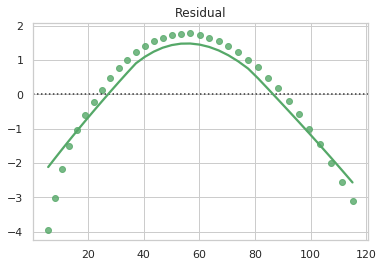

In [5]:
plt.scatter(xt,Y, alpha = 0.7)
plt.plot([300, 3600] , [m*300 + b, m*3600 + b], c = "red" )
plt.xlabel("Temperatura(K)")
plt.ylabel("Resistividad ($\mu \Omega$")
plt.title('Resistividad VS Temperatura')
plt.savefig('R_VS_T.png')
plt.show()
sns.set(style="whitegrid")
teo = r
ex = b + m*xt

sns.residplot(teo, ex, lowess=True, color="g" )
plt.title('Residual')
plt.savefig('residualRT.png')
plt.show()
